In [1]:
import os, sys
sys.path.append(os.path.realpath("../../"))

import pandas as pd
import numpy as np

df = pd.read_csv('./AirPassengers.csv', header=0)
df['Month'] = pd.to_datetime(df['Month']).dt.date
df.set_index('Month', inplace=True)
df.rename({'Passengers': 'y'}, axis=1, inplace=True)

df.head(5)

,y
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<Axes: xlabel='Month'>

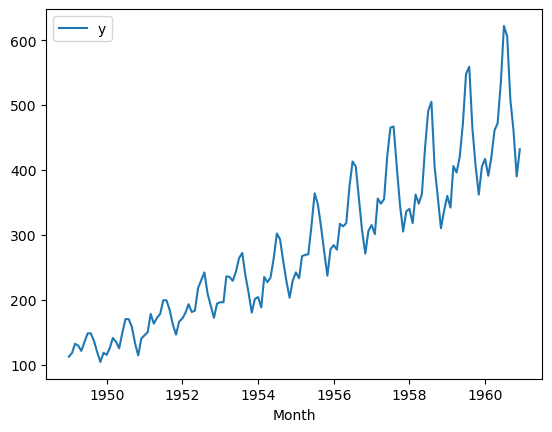

In [2]:
df.plot()

In [3]:
# ADF検定: 定常性検定
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import pandas as pd



# ADF検定の仮説
# 帰無仮説: 系列yは単位根過程である
# 対立仮説: 系列yは単位根過程でない
# p-valueが任意のp < αであれば、有意
# この結果はp値が1に近く、系列yは単位根過程である
dftest = adfuller(df['y'], autolag="AIC")
dfoutput = pd.Series(dftest[0:4], index=['t', 'p-value', '#lags Used', 'Number of Observations Useed'])
dfoutput

t                                 0.815369
p-value                           0.991880
#lags Used                       13.000000
Number of Observations Useed    130.000000
dtype: float64